# Random Triangles

We will estimate, by repeated sampling, the probability that three independent uniformly random points in the unit square $[0,1]^2$ form an acute triangle, i.e. one in which all angles are less than $\pi/2$. We will use enough samples to ensure that the standard deviation of your estimate of the probability is no more than 0.001.

Next, we will repeat for three independent uniformly random points in the unit disc $\{(x,y): x^2+y^2<1\}$.

Then we will repeat for three independent uniformly random points on the unit circle $\{(x,y): x^2+y^2=1\}$.

We will store the results in three variables named `prob_square`, `prob_disc`, `prob_circle` 

In [7]:
from random import random,randrange

import matplotlib.pyplot as plt
from math import *
import numpy as np

from sys import modules
try:
    del modules['random'].shuffle
except:
    pass
try:
    del modules['random'].choices
except:
    pass
try:
    del modules['numpy'].random
except:
    pass

In [8]:
def random_extreme(alpha):
    error_message = 'Error: parameter must be positive'
    if alpha <= 0:
        print(error_message)
        return None
    else:
        return ((-log(random()))**(-1/alpha))

Some samples with alpha= 10
[0.9638138894251865, 1.0603672974101153, 1.0347530122912876, 1.0904211528059262, 0.9533447740982037]
Should print error:
Error: parameter must be positive


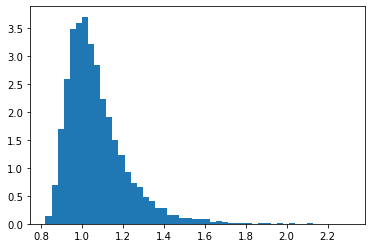

In [9]:

alpha=10

print('Some samples with alpha=',alpha)
print([random_extreme(alpha) for i in range(5)])

print('Should print error:')  
assert random_extreme(0)==None 

# 10000 samples with alpha=10
n=10000
alpha=10
data=[random_extreme(alpha) for i in range(n)]  

plt.hist(data,bins=50,density=True)

# Differentiate F by hand to find the probability density function f.
# Plot it on the same axes, and check that the fit looks plausible

plt.show()

In [10]:
n = 1000000
data20 = [(random_extreme(20)) for i in range(n)]
data10 = [(random_extreme(10)) for i in range(n)]
data07 = [(random_extreme(0.7)) for i in range(n)]
data05 = [(random_extreme(0.5)) for i in range(n)]
mean_20 = (sum(data20)/n)
mean_10 = (sum(data10)/n)
mean_0_7 = 'Infinity'
mean_0_5 = 'Infinity'

In [11]:
import random
def random_shuffle(x):
    for i in range(len(x)):
        ri = random.randint(i, len(x)-1)
        ello = x[ri]
        x[ri] = x[i]
        x[i] = ello
    return x

In [12]:
# simple tests
for i in range(5):
    print(random_shuffle([3,4,5]))

# trivial cases
assert random_shuffle([99])==[99]
assert random_shuffle([])==[]

# long lists should work too
print(random_shuffle(list(range(50))))

[4, 3, 5]
[4, 3, 5]
[3, 5, 4]
[5, 3, 4]
[3, 4, 5]
[44, 37, 33, 5, 19, 26, 18, 29, 8, 49, 39, 41, 20, 36, 30, 31, 13, 28, 47, 35, 23, 1, 2, 42, 12, 38, 3, 7, 48, 16, 40, 27, 4, 45, 0, 14, 9, 24, 11, 34, 21, 22, 32, 6, 25, 15, 17, 43, 46, 10]


In [13]:
# Partial example code - using a dictionary to record frequencies
# to be incorporated into your own testing code

freq=dict()    # an empty dictionary

# Example - increase the frequency count associated to a permutation y:
y=[5,3,4]

ty=tuple(y)               # convert to a tuple
if ty not in freq:        
    freq[ty]=1            # if we have not seen it before, count 1
else:
    freq[ty]=freq[ty]+1   # else increase the count by 1
    
# output the results
for k in freq:
    print(k,'appeared with frequency',freq[k])

(5, 3, 4) appeared with frequency 1


In [14]:
def random_discrete(p):
    box = []
    for i in p:
        if i>0:
            continue
        else:
            print('Error: negative value')
            return None
        
    if ((sum(p))-1)>1e-10:
        print('Error: not equal to 1')
        return None
    elif ((sum(p))-1)<(0.1):
        print('Error: not equal to 1')
        return None
    else:
        for n in range(len(p)):
            for prob in range(int(p[n]*100)):
                nv = n
                box.append(nv)
    ran = box[int(random()*100)]
    return ran

In [15]:
# test your function

assert random_discrete([.5,.3])==None
assert random_discrete([-2,1])==None
print([random_discrete([.3,.6,.1]) for i in range(20)])
print([random_discrete([.7,.1,.1,.1]) for i in range(20)])

Error: not equal to 1
Error: negative value
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1
Error: not equal to 1

In [16]:
prob = []
def sideLength(a,b,a2,b2):
    hi = (abs(a2-a))**2+(abs(b2-b))**2
    return hi**0.5
def acute(x1, y1, x2, y2, x3, y3):
    sideAB = sideLength(x1, y1, x2, y2)
    sideBC = sideLength(x2, y2, x3, y3)
    sideAC = sideLength(x3, y3, x1, y1)
    largest = max(sideAB, sideBC, sideAC)
    var1 = min(sideAB, sideBC, sideAC)
    if sideAB != largest and sideAB != var1:
        var2 = sideAB
    elif sideBC != largest and sideBC != var1:
        var2 = sideBC
    else:
        var2 = sideAC
    if (largest) ** 2 < ((var1) ** 2 + (var2) ** 2):
        return True
    else:
        return False
for i in range(700000):
    ptz = [[random.random(), random.random()] for i in range(3)]
    x = [p[0] for p in ptz]
    y = [p[1] for p in ptz]
    x1z = ptz[0][0]
    y1z = ptz[0][1]
    x2z = ptz[1][0]
    y2z = ptz[1][1]
    x3z = ptz[2][0]
    y3z = ptz[2][1]
    if acute(x1z,y1z,x2z,y2z,x3z,y3z) == True:
        prob.append(1)
    else:
        prob.append(0)
prob_square = np.mean(prob)
print(prob_square)
prob2 = []
for i in range(700000):
    def randdisc():
        while True:
            [x,y]=[random.random()*2-1,random.random()*2-1]
            if x**2+y**2<1:
                return (x,y)
    pts=[randdisc() for i in range(3)]
    x1 = pts[0][0]
    y1 = pts[0][1]
    x2 = pts[1][0]
    y2 = pts[1][1]
    x3 = pts[2][0]
    y3 = pts[2][1]
    if acute(x1,y1,x2,y2,x3,y3) == True:
        prob2.append(1)
    else:
        prob2.append(0)
prob_disc = np.mean(prob2)
print(prob_disc)
prob3 = []
for i in range(700000):
    ran = []
    for i in range(3):
        ran.append(2*np.pi*random.random())
    x1r = np.cos(ran[0])
    y1r = np.sin(ran[0])
    x2r = np.cos(ran[1])
    y2r = np.sin(ran[1])
    x3r = np.cos(ran[2])
    y3r = np.sin(ran[2])
    if acute(x1r,y1r,x2r,y2r,x3r,y3r) == True:
        prob3.append(1)
    else:
        prob3.append(0)
prob_circle = np.mean(prob3)
print(prob_circle)

0.27452571428571426
0.2802414285714286
0.24981142857142857


In [17]:
# approximate test
assert abs(prob_square-0.27)<0.05

In [18]:
# approximate test
assert abs(prob_disc-0.28)<0.05

In [19]:
# approximate test
assert abs(prob_circle-0.25)<0.05